# 特征重要性

## 线性模型

Populating the interactive namespace from numpy and matplotlib
[[-0.14132508  0.03600891 -0.01275293  1.3322573  -2.42483506  5.22578936
  -0.03085906 -0.90498889  0.17491856 -0.01110091 -0.65337208  0.01156316
  -0.33271283]]


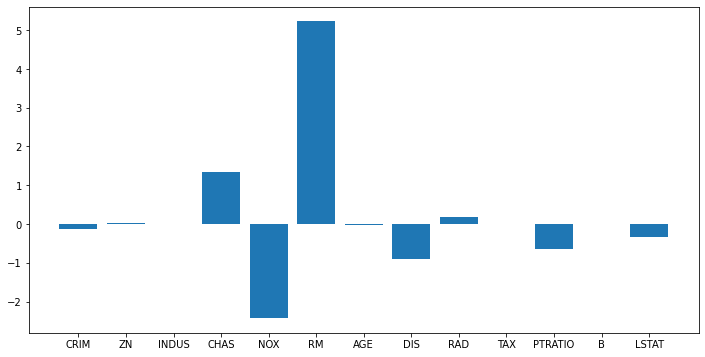

In [1]:
%pylab inline
import numpy as np
from sklearn.svm import SVR

from sklearn.datasets import load_boston
data = load_boston()

clf = SVR(kernel='linear')
clf.fit(data.data, data.target);
print(clf.coef_)

plt.figure(figsize=(12, 6))
plt.bar(range(1, 14), np.array(clf.coef_)[0])
_ = plt.xticks(range(1, 14), data.feature_names)

## 树模型

Populating the interactive namespace from numpy and matplotlib
[0.0423096  0.00091427 0.00549562 0.00064598 0.02284238 0.43103561
 0.01332939 0.0621235  0.00429076 0.01395788 0.01696742 0.0121899
 0.37389769]


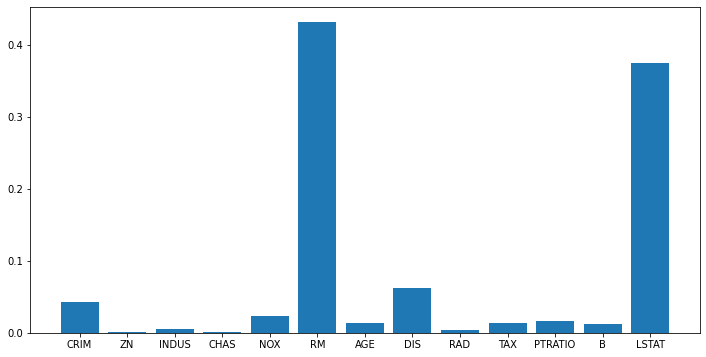

In [17]:
%pylab inline
import numpy as np
from sklearn.ensemble import RandomForestRegressor

from sklearn.datasets import load_boston
data = load_boston()

rf = RandomForestRegressor()
rf.fit(data.data, data.target);
print(rf.feature_importances_)

plt.figure(figsize=(12, 6))
plt.bar(range(1, 14), rf.feature_importances_)
_ = plt.xticks(range(1, 14), data.feature_names)

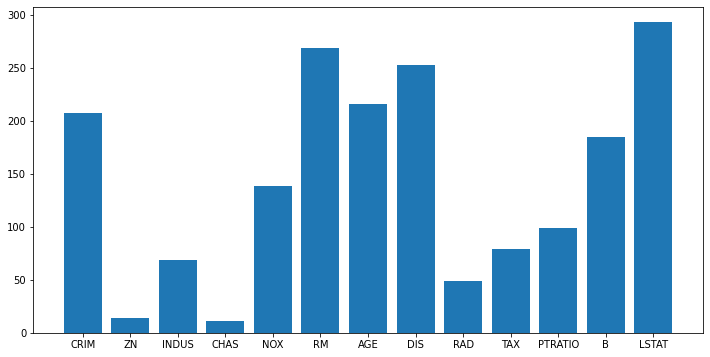

In [31]:
import numpy as np
from lightgbm import LGBMRegressor
data = load_boston()

clf = LGBMRegressor()
clf.fit(data.data, data.target)

plt.figure(figsize=(12, 6))
plt.bar(range(1, 14), clf.feature_importances_)
_ = plt.xticks(range(1, 14), data.feature_names)

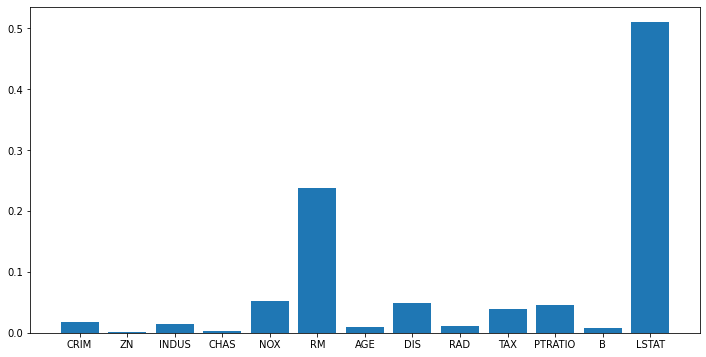

In [32]:
import numpy as np
from xgboost import XGBRegressor
data = load_boston()

clf = XGBRegressor()
clf.fit(data.data, data.target)

plt.figure(figsize=(12, 6))
plt.bar(range(1, 14), clf.feature_importances_)
_ = plt.xticks(range(1, 14), data.feature_names)

# 特征/字段被分裂的次数

# 特征筛选

## 利用方差

In [47]:
from sklearn.feature_selection import VarianceThreshold
X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X)

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

In [48]:
sel.fit_transform(data.data)
print(data.feature_names[~sel.get_support()])
print(data.feature_names)

['CHAS' 'NOX']
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


## 利用相关性

In [162]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.feature_selection import f_regression
sel = SelectKBest(f_regression, k='all').fit(data.data, data.target)
sel.fit_transform(data.data, data.target)
print(data.feature_names)
print(sel.scores_)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[ 89.48611476  75.2576423  153.95488314  15.97151242 112.59148028
 471.84673988  83.47745922  33.57957033  85.91427767 141.76135658
 175.10554288  63.05422911 601.61787111]


['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[ 89.48611476  75.2576423  153.95488314  15.97151242 112.59148028
 471.84673988  83.47745922  33.57957033  85.91427767 141.76135658
 175.10554288  63.05422911 601.61787111]


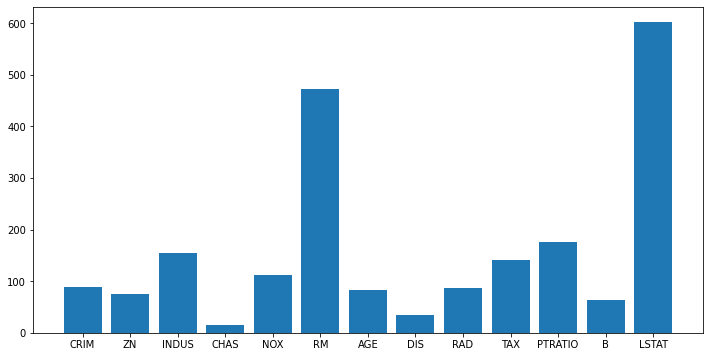

In [84]:
plt.figure(figsize=(12, 6))
plt.bar(range(data.data.shape[1]), sel.scores_)
_ = plt.xticks(range(data.data.shape[1]), data.feature_names)

## 利用线性模型

In [79]:
from sklearn.svm import LinearSVR
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVR().fit(data.data, data.target)
print(data.feature_names)
print(lsvc.coef_)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[-0.07939221  0.06258934 -0.01837238  0.35441038  0.18668377  4.54430761
  0.02473352 -0.76161038  0.22410099 -0.00819681 -0.22712844  0.02054354
 -0.50504469]


/home/lyz/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


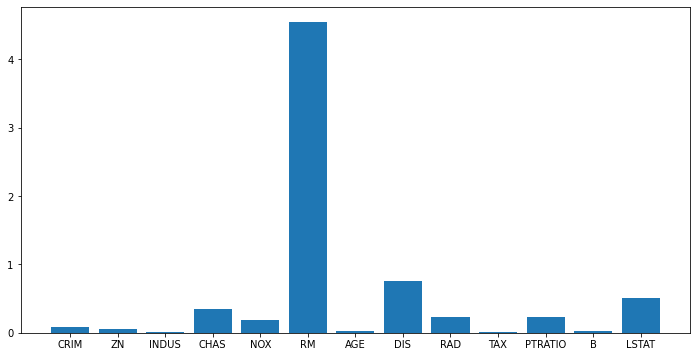

In [87]:
plt.figure(figsize=(12, 6))
plt.bar(range(data.data.shape[1]), np.abs(lsvc.coef_))
_ = plt.xticks(range(data.data.shape[1]), data.feature_names)

## 迭代消除

In [89]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesRegressor(n_estimators=50)
clf = clf.fit(data.data, data.target)
clf.feature_importances_

array([0.03224007, 0.00315812, 0.03973888, 0.01416753, 0.03835724,
       0.3111007 , 0.02238004, 0.03200759, 0.02188213, 0.04772824,
       0.04986004, 0.01772709, 0.36965235])

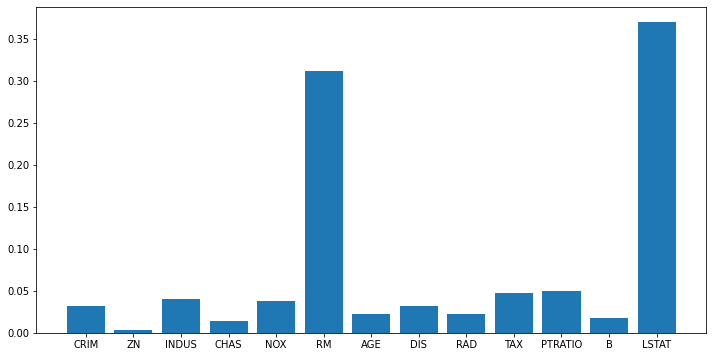

In [90]:
plt.figure(figsize=(12, 6))
plt.bar(range(data.data.shape[1]), clf.feature_importances_)
_ = plt.xticks(range(data.data.shape[1]), data.feature_names)

## 排列重要性

In [163]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.inspection import permutation_importance
clf = RandomForestRegressor().fit(data.data, data.target)
result = permutation_importance(clf, data.data, data.target, n_repeats=10,
                                random_state=0)
result.importances_mean

array([4.76156049e-02, 5.08557938e-04, 5.27477974e-03, 5.08443014e-04,
       4.33689240e-02, 5.41256342e-01, 1.77306889e-02, 1.22957618e-01,
       3.09760000e-03, 1.86233335e-02, 3.13693371e-02, 9.65301163e-03,
       5.61727832e-01])

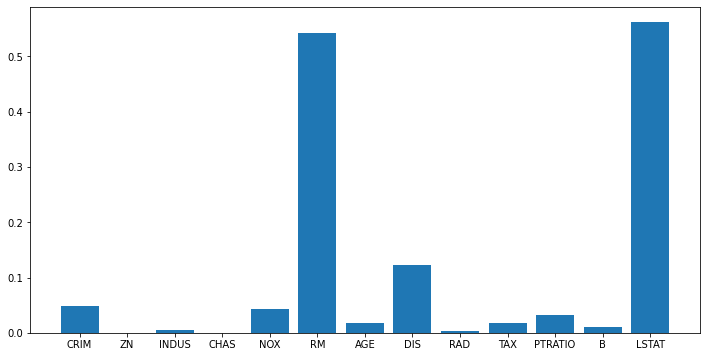

In [164]:
plt.figure(figsize=(12, 6))
plt.bar(range(data.data.shape[1]), result.importances_mean)
_ = plt.xticks(range(data.data.shape[1]), data.feature_names)

## Null Importance

In [153]:
# 对数据集计算特征重要性
# shuffle 列是否打乱
def get_feature_importances(data, target, feaure_name, shuffle, seed=None):
    
    # Shuffle target if required
    y = target.copy()
    if shuffle:
        np.random.shuffle(y)
    
    clf = RandomForestRegressor()
    clf.fit(data, y)
    imp_df = pd.DataFrame()
    imp_df["feature"] = feaure_name
    imp_df["importance_gain"] = clf.feature_importances_
    
    return imp_df

In [165]:
# 记录正常标签的下特征的重要性
actual_imp_df = get_feature_importances(data.data, data.target, data.feature_names, False)

In [166]:
null_imp_df = pd.DataFrame()
nb_runs = 40
import time
start = time.time()
dsp = ''
for i in range(nb_runs):
    # Get current run importances
    
    imp_df = get_feature_importances(data.data, data.target, data.feature_names, True)
    imp_df['run'] = i + 1 
    
    # Concat the latest importances with the old ones
    null_imp_df = pd.concat([null_imp_df, imp_df], axis=0)
    
    # Erase previous message
    for l in range(len(dsp)):
        print('\b', end='', flush=True)
    # Display current run and time used
    spent = (time.time() - start) / 60
    dsp = 'Done with %4d of %4d (Spent %5.1f min)' % (i + 1, nb_runs, spent)
    print(dsp)

Done with    1 of   40 (Spent   0.0 min)
Done with    2 of   40 (Spent   0.0 min)
Done with    3 of   40 (Spent   0.0 min)
Done with    4 of   40 (Spent   0.0 min)
Done with    5 of   40 (Spent   0.0 min)
Done with    6 of   40 (Spent   0.0 min)
Done with    7 of   40 (Spent   0.0 min)
Done with    8 of   40 (Spent   0.0 min)
Done with    9 of   40 (Spent   0.0 min)
Done with   10 of   40 (Spent   0.0 min)
Done with   11 of   40 (Spent   0.1 min)
Done with   12 of   40 (Spent   0.1 min)
Done with   13 of   40 (Spent   0.1 min)
Done with   14 of   40 (Spent   0.1 min)
Done with   15 of   40 (Spent   0.1 min)
Done with   16 of   40 (Spent   0.1 min)
Done with   17 of   40 (Spent   0.1 min)
Done with   18 of   40 (Spent   0.1 min)
Done with   19 of   40 (Spent   0.1 min)
Done with   20 of   40 (Spent   0.1 min)
Done with   21 of   40 (Spent   0.1 min)
Done with   22 of   40 (Spent   0.1 min)
Done with   23 of   40 (Spent   0.1 min)
Done with   24 of   40 (Spent   0.1 min)
Done with   25 o

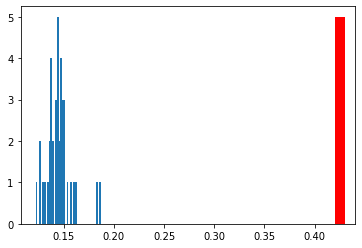

In [158]:
feat = 'RM'
ax = plt.hist(null_imp_df[null_imp_df['feature'] == feat]['importance_gain'], bins=nb_runs)

plt.vlines(x=actual_imp_df.loc[actual_imp_df['feature'] == feat, 'importance_gain'].mean(), 
               ymin=0, ymax=np.max(ax[0]), color='r',linewidth=10, label='Real Target')

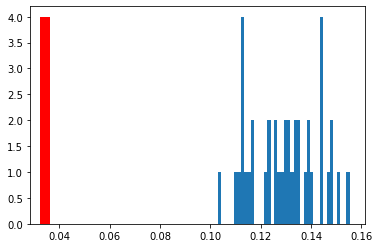

In [159]:
feat = 'CRIM'
ax = plt.hist(null_imp_df[null_imp_df['feature'] == feat]['importance_gain'], bins=nb_runs)
plt.vlines(x=actual_imp_df.loc[actual_imp_df['feature'] == feat, 'importance_gain'].mean(), 
               ymin=0, ymax=np.max(ax[0]), color='r',linewidth=10, label='Real Target')

In [167]:
null_imp_df

,feature,importance_gain,run
0,CRIM,0.113240,1
1,ZN,0.020848,1
2,INDUS,0.040871,1
3,CHAS,0.010355,1
4,NOX,0.047197,1
...,...,...,...
8,RAD,0.018578,40
9,TAX,0.031133,40
10,PTRATIO,0.033172,40
11,B,0.110816,40


# 模型可视化

## ELI5

https://eli5.readthedocs.io/en/latest/overview.html

In [14]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesRegressor(n_estimators=50)
clf = clf.fit(data.data, data.target)

import eli5
eli5.show_weights(clf)

Weight,Feature
0.3573 ± 0.3685,x12
0.3309 ± 0.2891,x5
0.0462 ± 0.0999,x4
0.0442 ± 0.1177,x10
0.0433 ± 0.0908,x9
0.0428 ± 0.1433,x2
0.0302 ± 0.0346,x7
0.0294 ± 0.0330,x0
0.0228 ± 0.0777,x8
0.0187 ± 0.0200,x6


In [18]:
from sklearn.datasets import fetch_20newsgroups

categories = ['alt.atheism', 'soc.religion.christian',
              'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(
    subset='train',
    categories=categories,
    shuffle=True,
    random_state=42,
    remove=('headers', 'footers'),
)
twenty_test = fetch_20newsgroups(
    subset='test',
    categories=categories,
    shuffle=True,
    random_state=42,
    remove=('headers', 'footers'),
)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline, make_pipeline

vec = TfidfVectorizer(min_df=3, stop_words='english',
                      ngram_range=(1, 2))
svd = TruncatedSVD(n_components=100, n_iter=7, random_state=42)
lsa = make_pipeline(vec, svd)

clf = SVC(C=150, gamma=2e-2, probability=True)
pipe = make_pipeline(lsa, clf)
pipe.fit(twenty_train.data, twenty_train.target)
pipe.score(twenty_test.data, twenty_test.target)

0.8901464713715047

In [20]:
import eli5
from eli5.lime import TextExplainer

te = TextExplainer(random_state=42)
te.fit(twenty_test.data[0], pipe.predict_proba)
te.show_prediction(target_names=twenty_train.target_names)

## shap

https://github.com/slundberg/shap

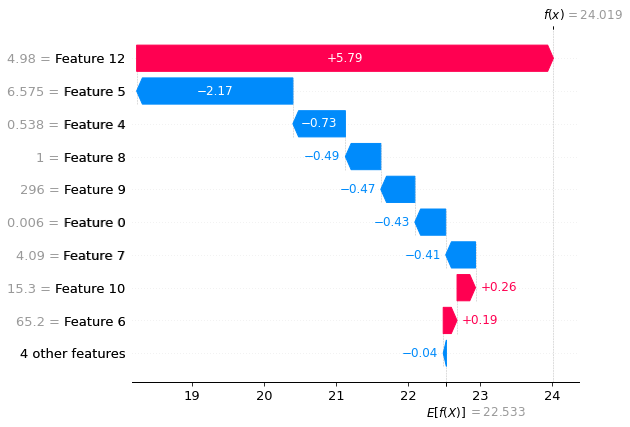

In [5]:
import xgboost as xgb
import shap

data = load_boston()
clf = xgb.XGBRegressor().fit(data.data, data.target)
explainer = shap.Explainer(clf)
shap_values = explainer(data.data)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

In [6]:
shap.plots.force(shap_values[0])

## Boruta

In [11]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy

data = load_boston()
rf = RandomForestRegressor().fit(data.data, data.target)

feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features - 5 features should be selected
feat_selector.fit(data.data, data.target)

# check selected features - first 5 features are selected
feat_selector.support_

# check ranking of features
feat_selector.ranking_

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	3
Iteration: 	9 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	3
Iteration: 	10 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	3
Iteration: 	11 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	3
Iteration: 	12 / 100
Confirmed: 	9
Tentative: 	1
Rejected: 	3
Iteration: 	13 / 100
Confirmed: 	9
Tentative: 	1
Rejected: 	3
Iteration: 	14 / 100
Confirmed: 	9
Tentative: 	1
Rejected: 	3
Iteration: 	15 / 100
Confirmed: 	9
Tentative: 	1
Rejected: 	3
Iteration: 	16 / 100
Confirmed: 	9
Tentative: 	1
Rejected: 	3
Iteration:

array([1, 4, 2, 5, 1, 1, 1, 1, 3, 1, 1, 1, 1])

In [12]:
feat_selector.support_

array([ True, False, False, False,  True,  True,  True,  True, False,
        True,  True,  True,  True])